In [153]:
import random as rand
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats 




In [154]:
plotdata = pd.read_csv('InsectChange/PlotData.csv', encoding='latin-1')
plotdata.head()

,Plot_ID,DataSource_ID,PlotName,Location,DetailsPlots,ExperimentalTreatment,Latitude,Longitude,Elevation,SourceGeogrData,...,CRUmnPrec,CRUdeltaPrec,CRUrelDeltaPrec,CHELSAmnC,CHELSAmnK,CHELSAdeltaTmean,CHELSArelDeltaTmean,CHELSAmnPrec,CHELSAdeltaPrec,CHELSArelDeltaPrec
0,1,1421,Upstream,Arkansas freshwater,3 km from dam,NaN,35.355549,-91.723184,NaN,Google maps,...,103.470691,-3.030788,-0.029291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1421,Downstream,Arkansas freshwater,7 km from dam,NaN,35.355549,-91.723184,NaN,Google maps,...,103.470691,-3.030788,-0.029291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1394,Makerere University Field Station,Makerere University Field Station,NaN,NaN,0.583000,30.333000,1500,Publication,...,94.533335,4.192598,0.044350,19.688667,292.848667,0.551469,0.001883,142.857500,35.750233,0.250251
3,4,1431,control,Alaska freshwater,control,control,68.633000,-149.400000,NaN,Publication,...,11.712778,-3.127381,-0.267006,-10.535444,262.624556,2.594107,0.009878,19.771111,4.993929,0.252587
4,5,1431,fertilized,Alaska freshwater,fertilized,fertilized,68.633000,-149.400000,NaN,Publication,...,11.712778,-3.127381,-0.267006,-10.535444,262.624556,2.594107,0.009878,19.771111,4.993929,0.252587


In [155]:
ABdata = pd.read_csv('InsectChange/InsectAbundanceBiomassData.csv', encoding='latin-1')
ABdata.dropna(subset = ["Number"], inplace=True)
ABdata.head()

,DataSource_ID,Plot_ID,Stratum,MetricAB,Period,Year,Number
0,63,190,Air,abundance,1,1959,130.0
2,63,190,Air,abundance,1,1961,45.0
3,63,190,Air,abundance,1,1962,126.0
4,63,190,Air,abundance,1,1963,255.0
5,63,190,Air,abundance,1,1964,80.0


In [156]:
ab63=ABdata[0:30]
x=ab63['Year']
y=ab63['Number']
pearsonr1 = stats.pearsonr(x,y)
print(pearsonr1)

(0.6171912784323931, 0.000280132538070094)


In [157]:
results = pearsonr1
print("r=" + str(results[0])+ "\n"+"p-value=" + str(results[1]))


r=0.6171912784323931
p-value=0.000280132538070094


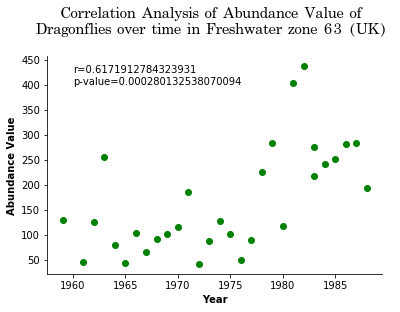

In [158]:
ax = plt.subplot(1,1,1)
plt.scatter(x,y, color = 'green')
plt.text(1960,400,"r=" + str(results[0])+ "\n"+"p-value=" + str(results[1]))  
plt.title('Correlation Analysis of Abundance Value of \nDragonflies over time in Freshwater zone 63 (UK) \n ', fontname='AppleMyungjo', size =15, fontweight="bold")
plt.xlabel('Year',fontweight="bold",size =10)
plt.ylabel('Abundance Value',fontweight="bold",size =10)
ax.spines['right'].set_visible(False)             
ax.spines['top'].set_visible(False)
plt.show()

In [159]:
regression = stats.linregress(x,y)
results = regression

print("R^2 = " + str(results.rvalue**2)+ "\n" + "r = " + str(results.rvalue)+ "\n" + "slope = "+ str(results.slope) + "\n" +"intercept = " + str(results.intercept))




R^2 = 0.38092507417301164
r = 0.617191278432393
slope = 7.619651989522265
intercept = -14874.824934514158


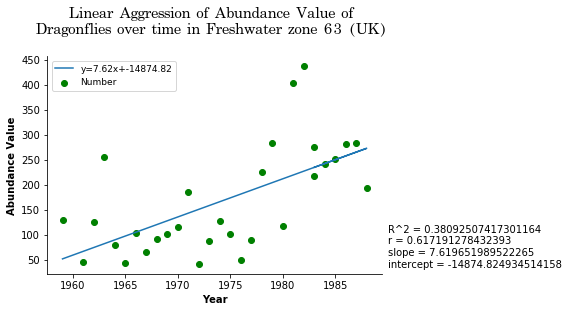

In [185]:
ax = plt.subplot(1,1,1)
plt.scatter(x,y, color = 'green')
plt.text(1990,35,"R^2 = " + str(results.rvalue**2)+ "\n" + "r = " + str(results.rvalue)+ "\n" + "slope = "+ str(results.slope) + "\n" +"intercept = " + str(results.intercept))
m, b = np.polyfit(x, y, 1)
line = plt.plot(x, m*x + b,label='y={:.2f}x+{:.2f}'.format(results.slope,results.intercept))
plt.legend(fontsize=9)
plt.title('Linear Aggression of Abundance Value of \nDragonflies over time in Freshwater zone 63 (UK) \n ', fontname='AppleMyungjo', size =15, fontweight="bold")
ax.spines['right'].set_visible(False)             
ax.spines['top'].set_visible(False)
plt.xlabel('Year',fontweight="bold",size =10)
plt.ylabel('Abundance Value',fontweight="bold",size =10)
plt.show()

In [179]:
#ABdata = ABdata.set_index("DataSource_ID")
control = ABdata[((ABdata['Plot_ID'] == 4))]
AKcontrol = control["Number"]


fertilized = ABdata[((ABdata['Plot_ID'] == 5))]
AKfertilized= fertilized["Number"]


AKcontrol_mean = np.mean(AKcontrol)
AKcontrol_sd = np.std(AKcontrol, ddof=1)

#print('AKcontrol mean = ' + str(round(AKcontrol_mean,3)))
#print('AKcontrol sd = ' + str(round(AKcontrol,3)))


#onesidedl = stats.ttest_1samp(ukdragonfly,75)

#print('t-statistic = ' + str(round(onesidedl.statistic,3)))
#print('p-value = ' + str(round(AKcontrol.pvalue,5)))

AKfertilized_mean = np.mean(AKfertilized)
AKfertilized_sd = np.std(AKfertilized, ddof=1)

twosided = stats.ttest_ind(AKcontrol,AKfertilized)
#print('AKfertilized mean = ' + str(round(AKfertilized_mean,3)))
#print('AKfertilized sd = ' + str(round(AKfertilized,3)))


#onesidedl = stats.ttest_1samp(ukdragonfly,75)

#print('t-statistic = ' + str(round(onesidedl.statistic,3)))
#print('p-value = ' + str(round(AKfertilized.pvalue,5)))




In [180]:
AKcontrol_CI = stats.t.interval(alpha=0.95, df=len(AKcontrol)-1, loc=AKcontrol_mean, scale=stats.sem(AKcontrol)) 
AKfertilized_CI = stats.t.interval(alpha=0.95, df=len(AKfertilized)-1, loc=AKfertilized_mean, scale=stats.sem(AKfertilized))
print(AKcontrol_CI)
print(AKfertilized_CI)

(7579.5367244308345, 17959.71274223583)
(12618.930603217877, 30466.40126344878)


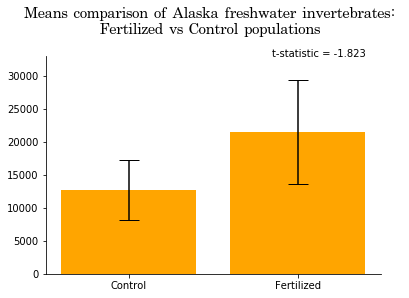

In [187]:
AKC = pd.DataFrame(AKcontrol)
AKC.columns =['Control']

AKF = pd.DataFrame(AKfertilized)
AKF.columns =['Fertilized']

df = AKC.join(AKF)
a = df.describe()
counts = a.loc['count'].values.tolist()
means = a.loc['mean'].values.tolist()
stdevs = a.loc['std'].values.tolist()
index = np.arange(len(df.columns))

CI = []
for i in range(len(means)):
    CIval = 1.96*stdevs[i]/(15**(0.5))
    CI.append(CIval)

fig, ax = plt.subplots()
#plt.bar([1,2],[means], yerr=[CI], capsize =10, color='orange')
plt.bar(index,means, yerr=CI, capsize=10, color ='orange')
plt.ylim(60,33000)
plt.text(0.85,33000,'t-statistic = ' + str(round(twosided.statistic,3)))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(index)
ax.set_xticklabels(df.columns)
plt.title('Means comparison of Alaska freshwater invertebrates: \n Fertilized vs Control populations  \n ', fontname='AppleMyungjo', size =15, fontweight="bold")
ax.spines['right'].set_visible(False)             
ax.spines['top'].set_visible(False)


In [285]:
ABdata.set_index("Plot_ID")
ManMeadow = ABdata[ ((ABdata['Plot_ID'] == 10) | (ABdata['Plot_ID'] == 11)) & (ABdata['MetricAB'] == "abundance") ]

MM = pd.DataFrame(ManMeadow)
MM = MM.drop(columns=[ 'Stratum','MetricAB','Period'])
MM["Plot_ID"]= MM["Plot_ID"].replace(10, "Managed Meadow")
MM["Plot_ID"]= MM["Plot_ID"].replace(11, "Abandoned Meadow")
#MM=MM.set_index("Plot_ID")


#AbandonedMeadow = ABdata[((ABdata['Plot_ID'] == 11) )& ((ABdata['MetricAB'] == "abundance") )]
#AM = pd.DataFrame(AbandonedMeadow)
#AM.drop(columns=[ 'Stratum','MetricAB','Period'])

#data_crosstab = pd.crosstab(index = MM.Plot_ID, columns=MM.Year, values=MM.Number, 
                             #aggfunc='count',                               #margins = False)
#data_crosstab
CT = MM.pivot_table(index='Plot_ID', columns='Year', values='Number', fill_value=0)
CT


Year,1998,2012
Plot_ID,,
Abandoned Meadow,1908.1,711.37
Managed Meadow,874.0,314.26


In [287]:
chi2, p, dof, expected = stats.chi2_contingency(CT)

print('Data')
print()
print(CT)
print()
print('Chi-square results')
print()
print('   chi-square = '+ str(round(chi2,4)))
print('   p value = '+ str(round(p,4)))
print('   degrees of freedom = '+ str(dof))
print('   expected values:')
print()

Data

Year                1998    2012
Plot_ID                         
Abandoned Meadow  1908.1  711.37
Managed Meadow     874.0  314.26

Chi-square results

   chi-square = 0.1748
   p value = 0.6759
   degrees of freedom = 1
   expected values:



In [ ]:
I hope I went about this the right way. When I was looking through the data, I liked perusing
the ones that had controls, so seeing if there was anything notable to look at between the 
managed and abandoned meadows in terms of abundance values, so I made my contingency table using
the .pivot_table function and then ran the chi-square analysis. Very high p-value resulted. 
